# Identifying patterns that determine whether a game succeeds or not

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)    
* [Stage 2. Data preparation](#data_preprocessing)
* [Stage 3. Analyzing the data](#data_analysis)
* [Stage 4. Creating a user profile for each region](#user_profiles)
* [Stage 5. Testing hypotheses](#data_test)
* [General Conclusion](#conclusion)

# Introduction <a id='intro'></a>
In this project, we will analyze historical data on game sales and identify patterns that determine whether a game succeeds or not.

### Stages 
We do not have information about the quality of the data, therefore, we would need to examine and preprocess the data before conducting the research. 

Firstly, we will evaluate the quality of the data and identify if there are any significant issues that need to be addressed. Secondly, we will preprocess the data: fill in/remove missing values and enrich the data by adding additional columns that will help us to work with the data. Then, we will analyze the data and create a user profile for each region. Finally, we will test statistical hypotheses about games ratings.
 
The project will consist of four stages:
 1. Data overview
 2. Data preparation
 3. Data analysis
 4. Regional user profiles creation
 5. Statistical hypotheses testing

# Stage 1. Data overview <a id='data_review'></a>

First of all, will load the data and the libraries that we will use in this project.

In [1]:
# Loading all required libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Loading the data into DataFrame
data=pd.read_csv('/datasets/games.csv')

We will display general data info and a sample of the data.

In [3]:
# printing the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# printing a sample of data
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


As can be seen, a lot of values are missing particularly in scores and rating columns. Before starting data analysis, we will address the issues with the data. Firstly, we will make column names lowercase and check how many values are missing.

In [5]:
#making colunm names lowercase
data.columns=data.columns.str.lower()

In [6]:
#checking how many values are missing
data.isnull().sum()*100/len(data)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

As can be seen, critic_score, user_score, and rating columns have 51, 40, and 40 percent of missing values correspondingly. This is a lot, so we will need to decide what to do with missing values on these columns. Year_of_release, genre, and name columns also have some data missing, which needs to be addressed.

Next will prepare the data for further analysis. We will go through each column one by one analyzing them and correcting incorrect and missing data.

# Stage 2. Data preparation  <a id='data_preprocessing'></a>

## Name

Displaying data where values in the name column are missing.

In [7]:
#printing data where values in nama column are missing
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


As can be seen, only 2 names are missing. In addition, these rows miss a lot of other information - genres, scores, and rating. Since it is only 2 rows, we will simply drop them.

In [8]:
#dropping rows with missing values in name column
data=data.dropna(subset = ['name'])

## Platform

According to the initial review, there is no missing data in this column. Therefore, we will just confirm that there are no duplicate values.

In [9]:
#printing unique values in platform column
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

It looks like there are no duplicate platform names, so we will leave this column as it is.

## Year_of_release

Displaying sample of the data where values in this column are missing.

In [10]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There does not seem to be a correlation between missing values in this column and any other column as release year is missing for different platforms, and genres. We will fill the missing values in that column with median values. But since the time span of the whole dataset is too large, we will use median values for platforms. The median values for platforms will be closer to the correct values than the median for the whole dataset.

In [11]:
#calculating median years for platforms and storing them into a variable
platform_median=data.pivot_table(index='platform', values='year_of_release',aggfunc='median')

In [12]:
#filling missing release values with platforms median values
data['year_of_release']=data.apply(lambda row:platform_median[platform_median.index==row['platform']]['year_of_release'] 
                                   if np.isnan(row['year_of_release']) else row['year_of_release'],axis=1)

In addition, the year_of_release column has an incorrect type - float, we will change it to int.

In [13]:
#changing the column type to int
data['year_of_release']=data['year_of_release'].astype('int')

## Genre

Displaying sample of the data where values in this column are missing.

In [14]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


There were no missing data in this column. Therefore, we will just confirm that there are no duplicate values.

In [15]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

It looks like there are no duplicate platform names, so we will leave this column as it is.

## Critic_score

More than half of the values in this column are missing. Most likely critics just did not score those games. It is likely that scores range can vary from genre to genre, therefore we will use median for a genre to fill missing values.

In [16]:
#calculating median critic score for genre and storing them into a variable
genre_critic_score=data.pivot_table(index='genre', values='critic_score',aggfunc='median')

In [17]:
#filling missing critic_score values with genre median critic_score values
data['critic_score']=data.apply(lambda row:genre_critic_score[genre_critic_score.index==row['genre']]['critic_score'] 
                                if np.isnan(row['critic_score']) else row['critic_score'],axis=1)

In addition, this column has an incorrect type - float, we will change it to int.

In [18]:
#changing the column type to int
data['critic_score']=data['critic_score'].astype('int')

## User_score

This column has object type meaning that there can be non-numerical values. Let's check it by counting unique values.

In [19]:
# counting unique values in user_score column
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.5       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

As can be seen, there are 2424 cells that have ‘tbd’ values. TBD means to be decided. In other words, they are not determined yet, so we will treat them as missing and will replace them with NaN.

In [20]:
#replacing 'tbd' values with NaN
data['user_score']=data['user_score'].replace('tbd', np.nan)

Now we will convert this column to float type.

In [21]:
#changing the column type to float
data['user_score']=data['user_score'].astype('float')

Similarly to critic_score and for the same reasons we will use median for a genre to fill missing values in this column.

In [22]:
#calculating median user score for genre and storing them into a variable
genre_user_score=data.pivot_table(index='genre', values='user_score',aggfunc='median')

In [23]:
#filling missing user_score values with genre median user_score values
data['user_score']=data.apply(lambda row:genre_user_score[genre_user_score.index==row['genre']]['user_score'] 
                                if np.isnan(row['user_score']) else row['user_score'],axis=1)
data['user_score']=data['user_score'].astype('float')

## Rating

Firstly, we will check all unique values in this column.

In [24]:
#printing unique values in rating column
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

As can be seen this column has categorical values. Therefore, we cannot use mean or median to fill missing values. Instead, we can use the most popular rating for the genre to fill it. To find the most popular rating for a genre we will group the data by genre and aggregate rating column using Series.mode function where mode - the value that appears most often. For simplicity of use, we will convert the result to a dictionary.

In [25]:
#getting the most popular rating for each genre
pop_ratings = data.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()

In [26]:
#filling missing rating values with the most popular value for a genre
data['rating']=data.apply(lambda row:pop_ratings[row['genre']]
                                if pd.isna(row['rating']) else row['rating'],axis=1)

Columns na_sales, eu_sales, jp_sales, and other_sales are in the correct numerical type (float) and do not have missing values, therefore, we will leave them as they are.

Let's confirm that all missing values were addressed.

In [27]:
#displaying info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


There are no missing values left.

## Calculatin the total sales 

During analysis, we will use total sales for all region values. To simplify the analysis we will calculate the sum of sales in all regions for each game and put these values in a separate column.

In [28]:
#culculating sum of sales in all regions for each game and putting these values in a separate column.
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

Let's confirm that the column was added correctly.

In [29]:
#printing a sample of the data
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,T,31.38


We evaluated the quality of the data, identified and addressed the issues with the data, and enriched the data. Next, we will analyze the data.

# Stage 3 Analyzing the data<a id='data_analysis'></a>

At this stage, we will analyze the data and identify patterns that determine whether a game succeeds or not.

First of all, we will look at how many games were released in different years and will decide if the data for every period is significant. To do this, we will group the data by year_of_release and will put it on the plot.

In [30]:
#groupping data by year_of_release
games_per_years=data.groupby('year_of_release')['year_of_release'].count()

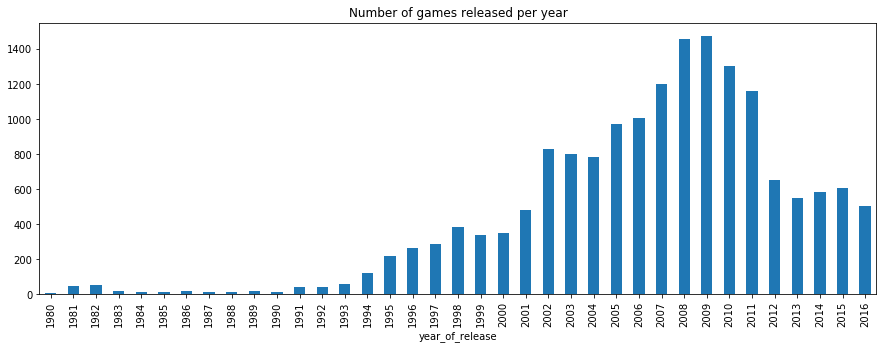

In [31]:
#plotting the data
games_per_years.plot(kind='bar', figsize=(15,5), title='Number of games released per year')
plt.show()

As can be seen, just a few games were released every year before 1991. Starting from 1991 number of games released per year constantly grew and peaked in 2008-2009.

Secondly, we will check how sales varied from platform to platform.

In [32]:
#culculation tatal sales per platform
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

As can be seen, PS2 has the largest total sales over the platform lifetime, followed by X360 and then PS3. We will use sales data for these 3 platforms and will build a distribution based on data for each year. Based on the distribution we will determine the typical lifecycle of a platform.

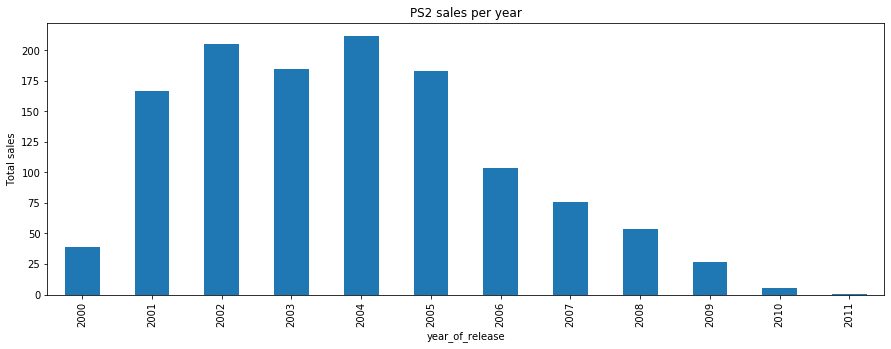

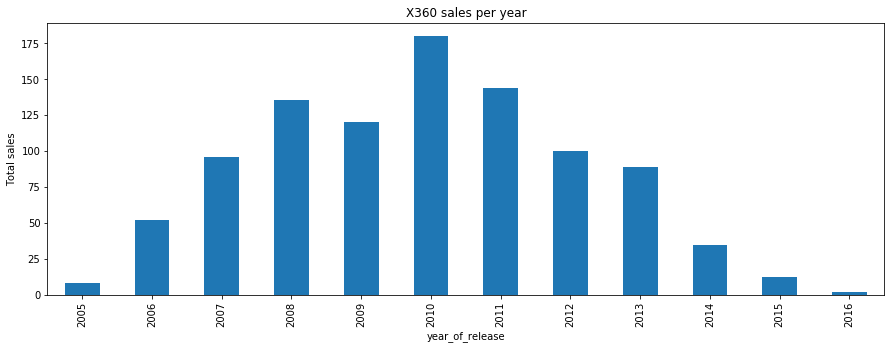

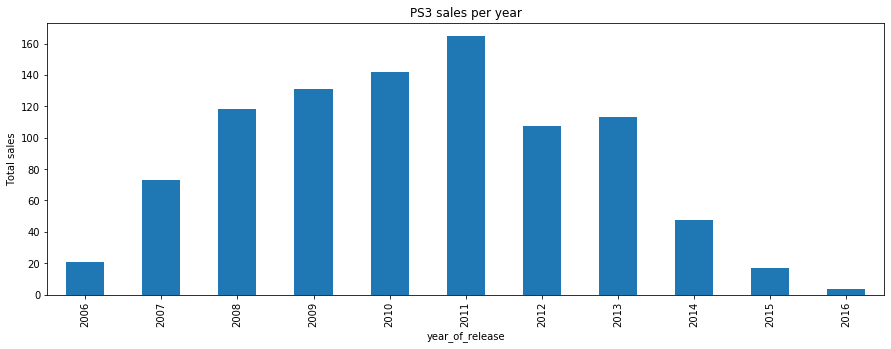

In [33]:
#plotting the sales by year data for top 3 platforms
for platform in ['PS2', 'X360', 'PS3']:
    data[data['platform']==platform].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', 
                                                                                      figsize=(15,5), 
                                                                                      title=platform+' sales per year')
    plt.ylabel('Total sales')                                                                            
    plt.show()

As can be seen, a typical lifecycle of a platform spans over 11 years. In the begging sales amount for the platform is constantly growing and peaking on 5-6 years after the platform release. Then, sales amount for the platform is constantly declining. As the relevance of the game falls according to the plots on average for 3-5 years, for further analysys we will use data the last 4 years to exclude the irrelevant data.

In [34]:
#dropping the date that is older than 11 years
data=data.query('year_of_release>2012')

Next, for the selected data, we will find out which platforms are leading in sales and which ones are growing or shrinking. To do this, firstly, we will calculate total sales for each platform. Then, for each platform, we will build a distribution based on data for each year.

In [35]:
#culculating total sales for each platform and saving the result to a variable
platforms_by_total_sales=data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#printing platforms_by_total_sales
platforms_by_total_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     144.44
X360    136.80
WiiU     64.63
PC       39.43
PSV      33.25
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

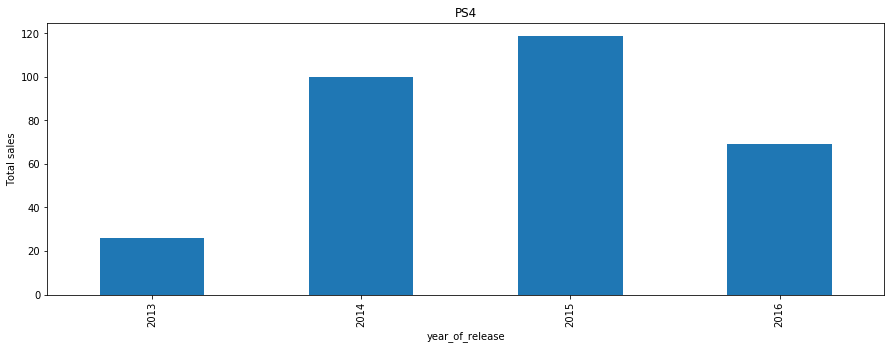

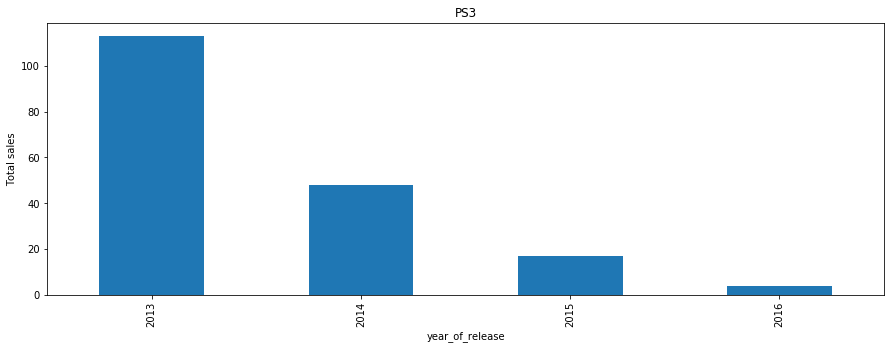

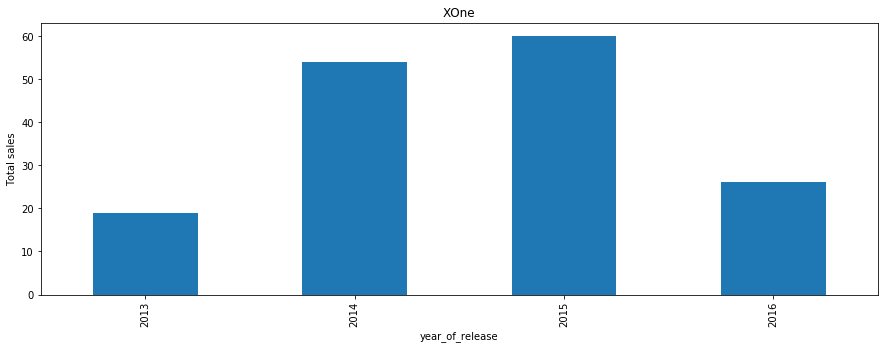

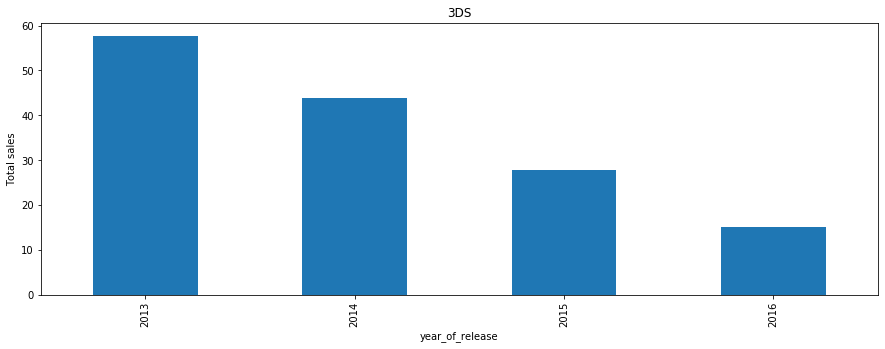

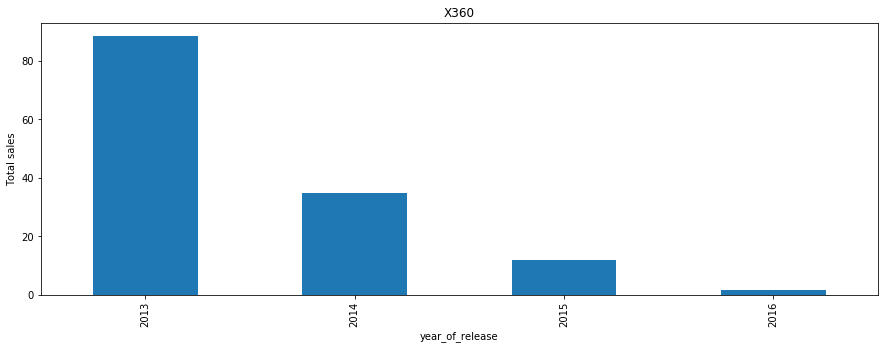

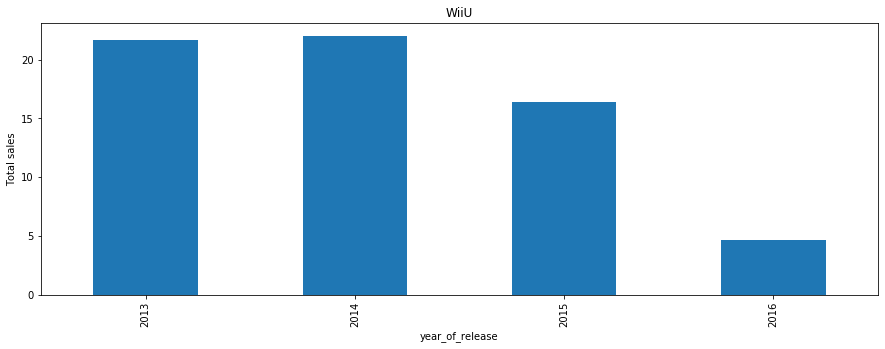

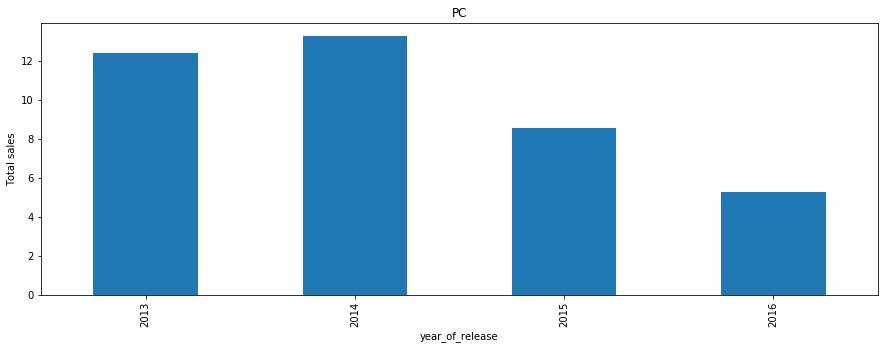

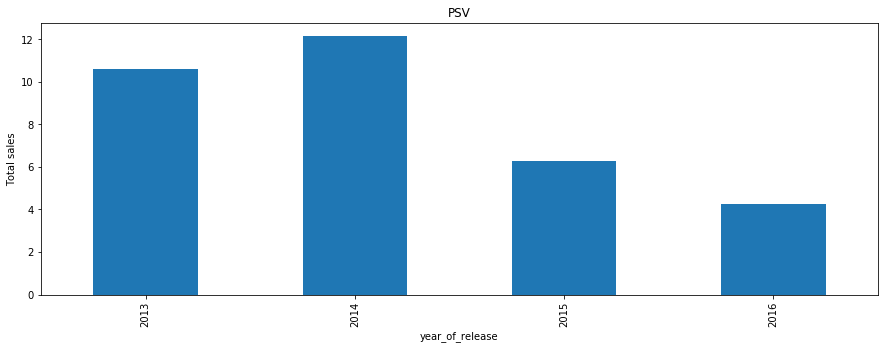

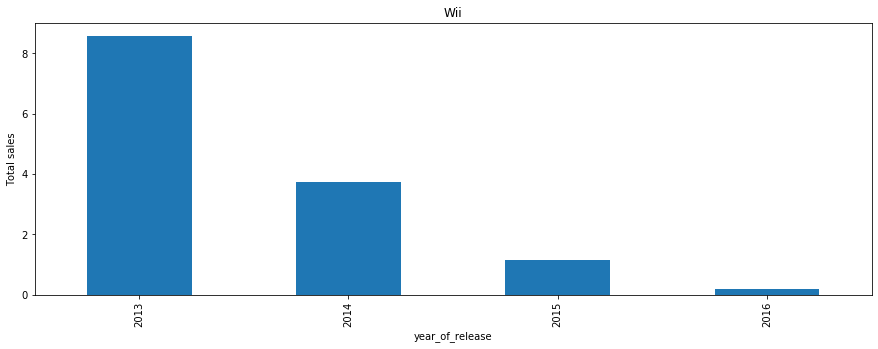

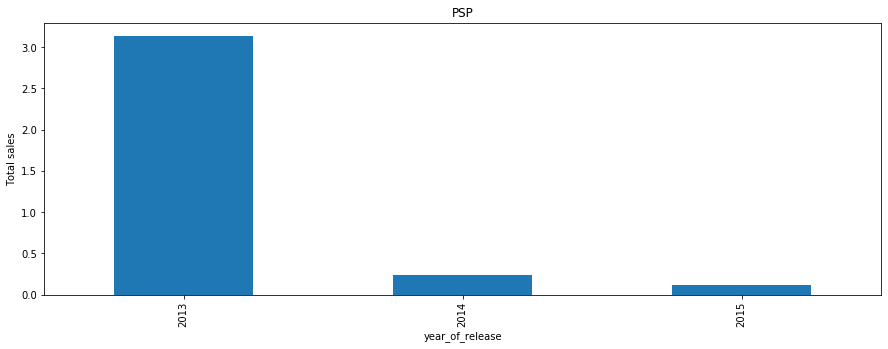

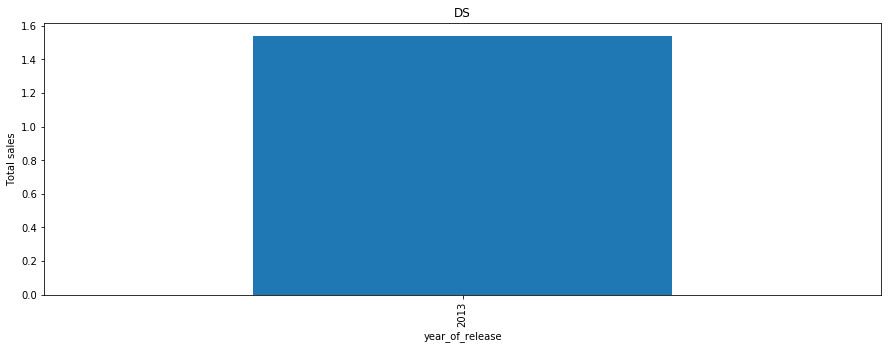

In [36]:
for platform in platforms_by_total_sales.index:
    data[data['platform']==platform].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(15,5))
    plt.title(platform)
    plt.ylabel('Total sales')
    plt.show()

PS4, PS3, and XONE platforms are leading in total sales, but it looks like PS3 platform is at the end of typical platform lifecycle.
PS4 and XONE platforms look promising. They were released just a few years ago and sales for them were constantly growing. Although the sales for them in 2016 are lower than in 2015, it may be because the sales data for the current year is incomplete. According to the platform’s typical lifecycle, sales for PS4 and XONE may peak in an upcoming couple of years.

Next, we will build a box plot for the global sales of all games, broken down by platform. This will help us to find out how the global sales for the games for the two promising platforms stand against sales for other platforms.

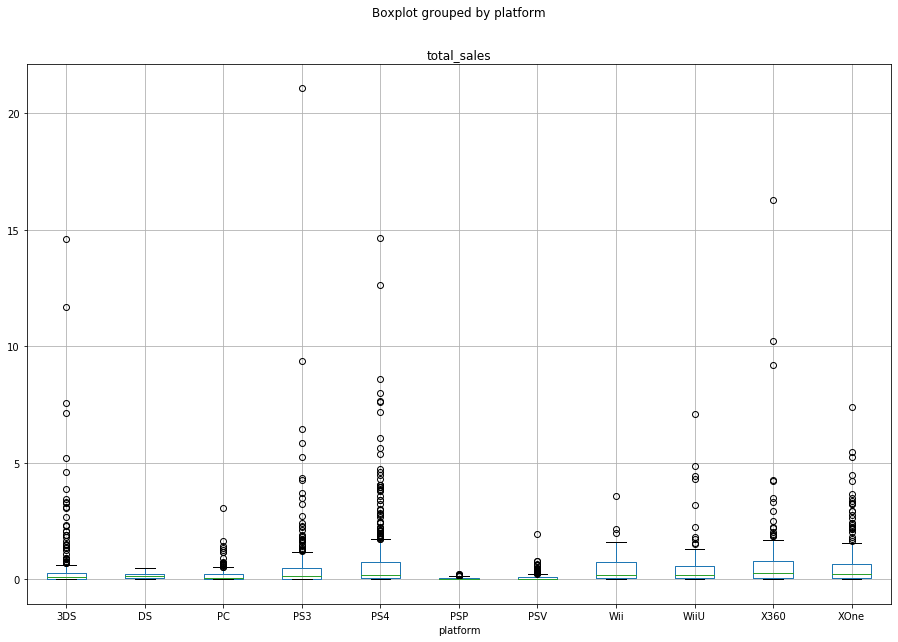

In [37]:
#creating a boxplot for the global sales of all games, broken down by platform
data.boxplot('total_sales', by='platform', figsize=(15,10))
plt.show()

Due to large outliers, it is difficult to see the medians and quantiles for sales. We will rebuild the plot limiting values on the y-axis.

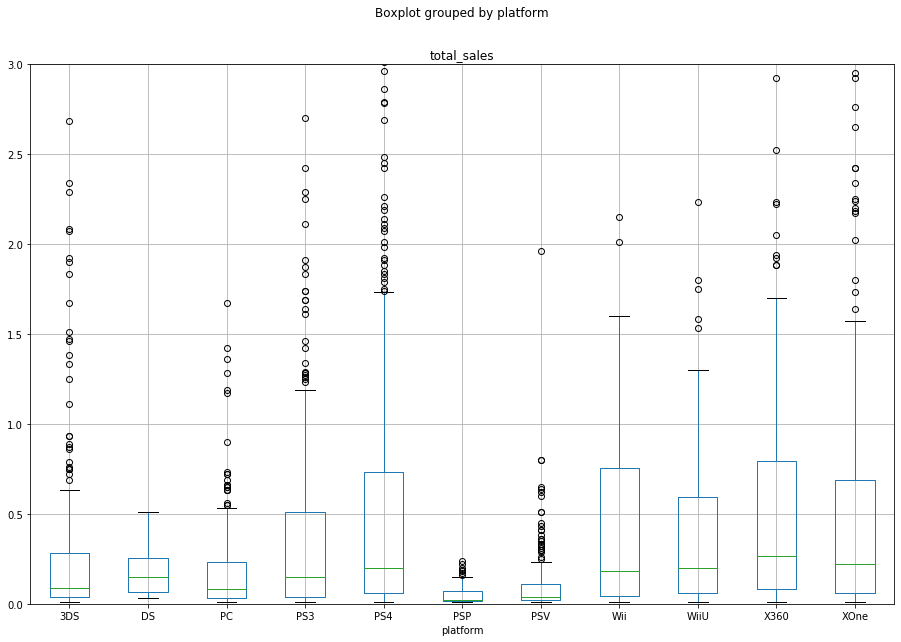

In [38]:
#creating a boxplot for the global sales of all games, broken down by platform with limited y axis
data.boxplot('total_sales', by='platform', figsize=(15,10))
plt.ylim(0,3)
plt.show()

X360 has the largest median game global sales, but median sales for the selected platforms are not significantly lower. This confirms that selected PS4 and XONE platforms are good candidates.

To help us to select the correct games for sale for the selected platforms, we will take a look at how user and professional reviews affect sales for the PS4 platform. We will build scatter plots and calculate the correlation between reviews and sales.

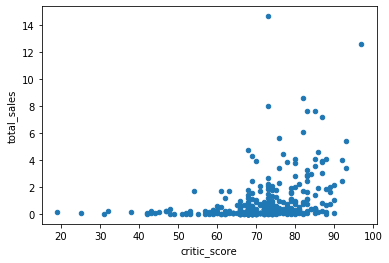

In [39]:
#taking a slice of data for PS4 platform
data_ps4=data[data['platform']=='PS4']

#building a scatter plot for PS4 data between critic reviews and sales
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

In [40]:
# culculating correlation between critic reviews and sales
data_ps4['critic_score'].corr(data_ps4['total_sales'])

0.35140802447758474

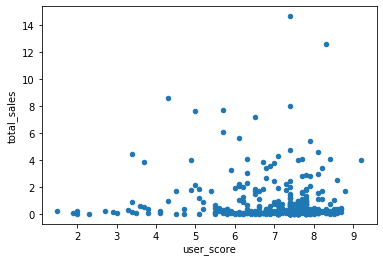

In [41]:
#building a scatter plot for PS4 data between user reviews and sales
data_ps4.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

In [42]:
# culculating correlation between user reviews and sales
data_ps4['user_score'].corr(data_ps4['total_sales'])

-0.0654819507758568

As can be seen, there is a weak positive linear correlation between sales and critic reviews and a weak negative linear correlation between sales and user reviews. From scatter plots the correlation between sales and reviews is also not visible.

Next, we will take a look at how user and professional reviews affect sales for XONE and PS3 platforms and will compare the result with the result for the PS4 platform.

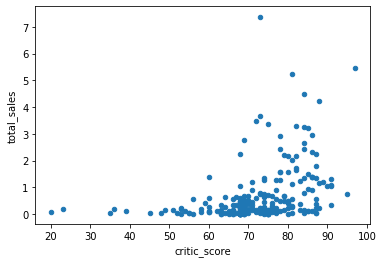

In [43]:
#taking a slice of data for XONE platform
data_xone=data[data['platform']=='XOne']

#building a scatter plot for XONE data between critic reviews and sales
data_xone.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

In [44]:
# culculating correlation between critic reviews and sales
data_xone['critic_score'].corr(data_xone['total_sales'])

0.3786581617346427

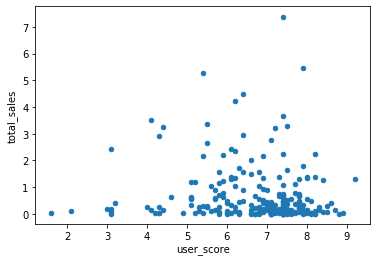

In [45]:
#building a scatter plot for XONE data between user reviews and sales
data_xone.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

In [46]:
#culculating correlation between user reviews and sales
data_xone['user_score'].corr(data_xone['total_sales'])

-0.10515664470960723

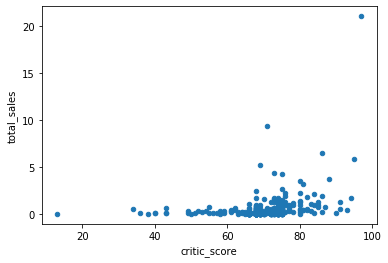

In [47]:
#taking a slice of data for PS3 platform
data_ps3=data[data['platform']=='PS3']

#building a scatter plot for PS3 data between critic reviews and sales
data_ps3.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

In [48]:
# culculating correlation between critic reviews and sales
data_ps3['critic_score'].corr(data_ps3['total_sales'])

0.3071457786092334

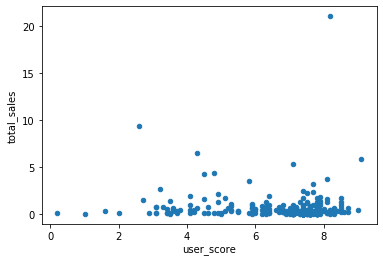

In [49]:
#building a scatter plot for PS3 data between user reviews and sales
data_ps3.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

In [50]:
#culculating correlation between user reviews and sales
data_ps3['user_score'].corr(data_ps3['total_sales'])

-0.08598425479117175

The correlation between reviews and sales for XONE and PS3 platforms looks similar to the correlation for PS4 platform. XONE has the strongest positive linear correlation between critic reviews and sales, but still, it is relatively weak to say that sales are strongly dependent on critic reviews. Therefore, when selecting games for sales in 2017 it is not recommended to rely on reviews.

Also, we will look at the general distribution of games by genre and find the most profitable genres. To do this, firstly, we will count the number of games in each genre. Then, we will count total sales for each genre. And finally, for each genre, we will divide total sales by the number of games to find the average profit for a game of a particular genre.

In [51]:
#culculating number of games in each genre
data.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          767
Role-Playing    294
Adventure       246
Sports          215
Shooter         188
Misc            155
Racing           86
Fighting         80
Platform         74
Simulation       64
Strategy         56
Puzzle           17
Name: name, dtype: int64

In [52]:
#culculating total sales in each genre
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          322.27
Shooter         233.05
Sports          150.67
Role-Playing    146.18
Misc             62.82
Platform         42.63
Racing           39.98
Fighting         35.31
Adventure        23.73
Simulation       22.25
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

In [53]:
#calculating average profit for a game of a particular genre.
(data.groupby('genre')['total_sales'].sum()/data.groupby('genre')['name'].count()).sort_values(ascending=False)

genre
Shooter         1.239628
Sports          0.700791
Platform        0.576081
Role-Playing    0.497211
Racing          0.464884
Fighting        0.441375
Action          0.420169
Misc            0.405290
Simulation      0.347656
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096463
dtype: float64

As can be seen, although Actions are leading in total sales, they are just in 7th place by profitability. Shooters are in second place by total sales, but they are the most profitable type of game. In fact, they are 3 time profitable as actions. Sports are in third place by total sales and in second by profit. Therefore, we would recommend considering Shooters and Sports when choosing games for sale for the next year.

# Stage 4 Creating a user profile for each region<a id='user_profiles'></a>

At this stage for each region (NA, EU, JP) we will determine the top five platforms, the top five genres, and top 5 ESRB ratings. Then we will describe variations in their market shares from region to region.

Finding the top five platforms, the top five genres, and top 5 ESRB ratings for NA region.

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      39.04
Name: na_sales, dtype: float64


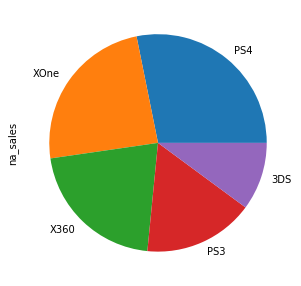

genre
Action          126.23
Shooter         109.78
Sports           65.27
Role-Playing     46.51
Misc             27.49
Name: na_sales, dtype: float64


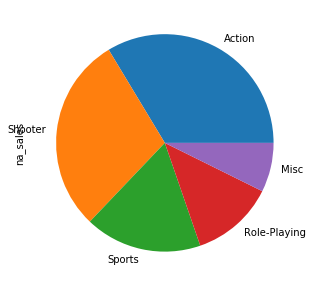

rating
M       184.77
E       102.49
T        96.90
E10+     54.50
Name: na_sales, dtype: float64


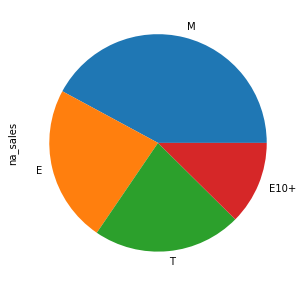

In [54]:
#loopping throgh platform, genre, and rating in the region. 
#Finding, printing and plotting top 5 elements leading by sales.
for colunm in ['platform', 'genre', 'rating']:    
    region_data=data.groupby(colunm)['na_sales'].sum().sort_values(ascending=False).head()
    print(region_data)
    region_data.plot(kind='pie',figsize=(15,5))
    plt.show()

Finding the top five platforms, the top five genres, and top 5 ESRB ratings for EU region.

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      31.17
Name: eu_sales, dtype: float64


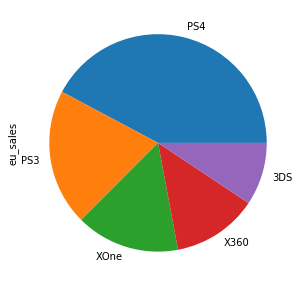

genre
Action          118.32
Shooter          87.88
Sports           60.52
Role-Playing     37.02
Racing           20.19
Name: eu_sales, dtype: float64


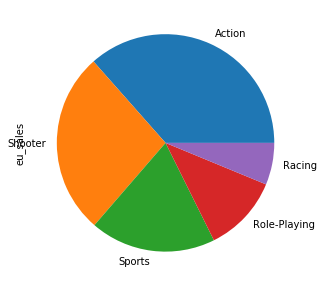

rating
M       162.21
E       108.39
T        79.01
E10+     42.88
Name: eu_sales, dtype: float64


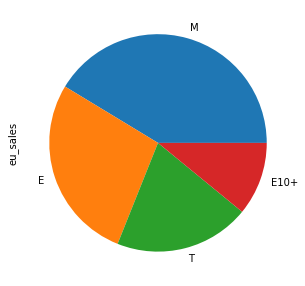

In [55]:
#loopping throgh platform, genre, and rating in the region. 
#Finding, printing and plotting top 5 elements leading by sales.
for colunm in ['platform', 'genre', 'rating']:
    region_data=data.groupby(colunm)['eu_sales'].sum().sort_values(ascending=False).head()
    print(region_data)
    region_data.plot(kind='pie',figsize=(15,5))
    plt.show()

Finding the top five platforms, the top five genres, and top 5 ESRB ratings for JP region.

platform
3DS     67.86
PS3     23.35
PSV     18.66
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


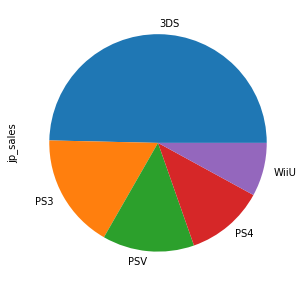

genre
Role-Playing    51.14
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


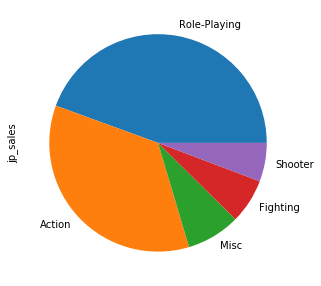

rating
T       86.72
E       33.37
M       14.92
E10+     5.89
Name: jp_sales, dtype: float64


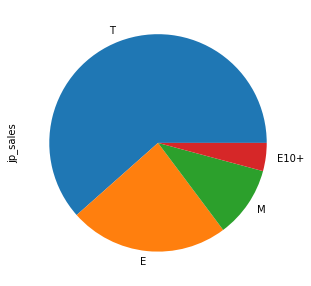

In [56]:
#loopping throgh platform, genre, and rating in the region. 
#Finding, printing and plotting top 5 elements leading by sales.
for colunm in ['platform', 'genre', 'rating']:
    region_data=data.groupby(colunm)['jp_sales'].sum().sort_values(ascending=False).head()
    print(region_data)
    region_data.plot(kind='pie',figsize=(15,5))
    plt.show()

As can be seen, the EU and NA regions are quite similar. In both regions Actions are leading in total sales followed by Shooters and Sports. The games with M rating also lead the sale followed by E and T ratings. But although PS4 platform is leading by sales in both regions, X paltform is also popular in the NA region. 

JP region profile differs from two other regions. The most popular platform there is 3DS, and the most popular genre is Role-Playing. The vast majority of games sold there have T and E ratings.

# Stage 5 Testing hypotheses <a id='data_test'></a>

In this final stage, we will test two statistical hypotheses regarding the rating for different platforms and genres. In both cases, we will test hypotheses that the means of the two statistical populations are equally based on samples taken from them. To do this we will apply the method scipy.stats.ttest_ind. In both cases, we will use a critical statistical significance level - alpha = 0.05. We will compare the p-value returned by scipy.stats.ttest_ind will be with alpha. If the p-value will be less than alpha, we will reject the hypothesis, otherwise, we will keep the hypothesis.

## Average user ratings of the Xbox One and PC platforms are the same

For this hypothesis, we will formulate null hypotheses as "Average user ratings of the Xbox One and PC platforms are the same". The alternative hypothesis will be "Average user ratings of the Xbox One and PC platforms are different". Before testing the hypothesis, we will compare the variances of the samples in order to understand with which equal_var parameter to use the ttest_ind test method. For this, we will use Levene's statistic test. The Center parameter in Levene's test depends on data distribution. So, we will check the data distribution first in order to determine which value for this parameter we should use.

In [57]:
#taking slices of user_scores data for Xbox One and PC platforms
xbox_user_rating=data.query('platform=="XOne"')['user_score']
pc_user_rating=data.query('platform=="PC"')['user_score']

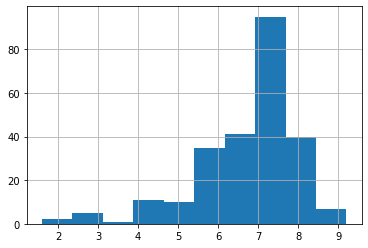

In [58]:
#plotting histograms for the selected data for Xbox One
xbox_user_rating.hist()
plt.show()

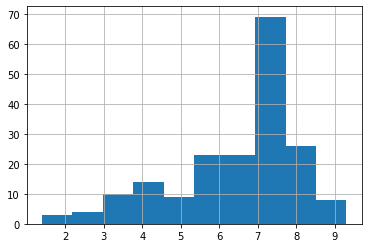

In [59]:
#plotting histograms for the selected data for PC
pc_user_rating.hist()
plt.show()

Data is skewed, so we will use the median as a value for the center parameter in Levene's test.

In [60]:
#performing Levene's test
stat, p = st.levene(xbox_user_rating, pc_user_rating, center='median')
p

0.001802066124442326

The small p-value suggests that the populations do not have equal variances. Therefore, we will use equal_var=False.

In [61]:
#Testing the hypothesis
results = st.ttest_ind(xbox_user_rating, pc_user_rating, equal_var=False)

#printing p-value received in the test
print('p-value: ', results.pvalue)

p-value:  0.05355232069397892


As can be seen, the p-value is higher than alpha. It tells us that there is a probability of randomly getting a user rating difference that size or larger. In other words, the difference in user ratings can be a result of random. Therefore, we will keep the null hypothesis.

## Average user ratings for the Action and Sports genres are different

For this hypothesis, we will formulate null hypotheses as "Average user ratings for the Action and Sports genres are the same". The alternative hypothesis will be "Average user ratings for the Action and Sports genres are different". Similar to the first hypothesis, before testing, we will compare the variances of the samples in order to understand with which equal_var parameter to use the ttest_ind test method.

In [62]:
#taking slices of user_scores data for Actions and Sports genres
action_user_rating=data.query('genre=="Action"')['user_score']
sports_user_rating=data.query('genre=="Sports"')['user_score']

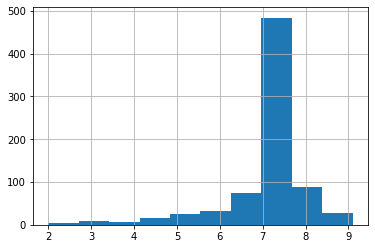

In [63]:
#plotting histograms for the selected data for Actions
action_user_rating.hist()
plt.show()

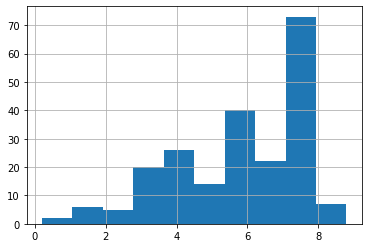

In [64]:
#plotting histograms for the selected data for Sports
sports_user_rating.hist()
plt.show()

Data is skewed, so we will use the median as a value for the Center parameter in Levene's test.

In [65]:
#performing Levene's test
stat, p = st.levene(action_user_rating, sports_user_rating, center='median')
p

1.1016145701015452e-36

The small p-value suggests that the populations do not have equal variances. Therefore, we will use equal_var=False.

In [66]:
#Testing the hypothesis
results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var=False)

#printing p-value received in the test
print('p-value: ', results.pvalue)

p-value:  4.8469372746133194e-21


As can be seen, the p-value is much lower than the alpha. Such a small p-value tells us that there is an extremely low probability of randomly getting a user rating difference that size or larger. In other words, the difference in user rating between the Actions and Sports genres is not random. Therefore, we are rejecting the null hypothesis.

# General conclusion <a id='conclusion'></a>

In this project, we analyzed historical data on game sales and identify patterns that determine whether a game succeeds or not.

Firstly, we evaluate the quality of the data and identified that critic_score, user_score, and rating columns had 51, 40, and 40 percent of missing values correspondingly. We filled the missing in critic_score, user_score columns with median values for genres, and with the most popular rating in the rating column. Year_of_release, genre, and name columns also had some missing data, which also was addressed. In addition, since we needed total sales values for all games, we calculated the sum of sales in all regions for each game and put these values in a separate column.

Secondly, we analyzed the data. We found that a typical lifecycle of a platform spans over 11 years. In the begging sales amount for the platform is constantly growing and peaking on 5-6 years after the platform release. Then, sales amount for the platform is constantly declining. As the relevance of the game falls according to the plots on average for 3-5 years, for further analysys we used data the last 4 years to exclude the irrelevant data. Based on that data we found that PS4 and XONE platforms look promising. They were released just a few years ago and sales for them were constantly growing. According to the platform’s typical lifecycle, sales for PS4 and XONE may peak in the upcoming couple of years. Also, it appears that median game sales for the selected platform are not significantly lower than the highest median game sales. This confirms that selected PS4 and XONE platforms are good candidates. In addition, it was found that there is a relatively weak linear correlation between reviews and sales to say that sales are dependable on reviews. As well, we revealed that although Actions leading in total sales, they are just in 7th place by profitability. Shooters are in second place by total sales, but they are the most profitable type of game. In fact, they are 3 times profitable as actions. Sports are in third place total sales and in second by profit.

Next, for each region (NA, EU, JP) we determined the top platforms, genres, and ESRB ratings. It appeared that the EU and NA regions are quite similar. In both regions Actions are leading in total sales followed by Shooters and Sports. The games with M rating also lead the sale followed by E and T ratings. But although PS4 platform is leading by sales in both regions, X paltform is also popular in the NA region. JP region profile differs from two other regions. The most popular platform there is 3DS, and the most popular genre is Role-Playing. The vast majority of games sold there have T and E ratings.

Finally, we tested two statistical hypotheses regarding the rating for different platforms and genres. Based on the tests we kept hypothesis formulated as "Average user ratings of the Xbox One and PC platforms are the same" and rejected the one formulated as "Average user ratings for the Action and Sports genres are the same".

Based on the findings, we would recommend the following strategy for 2017:
1. For EU and NA regions focus on Shooters and Sports games with M, E, and T ratings. Since PS4 platform leading in sales in both regions, focus on PS4 in both regions and in addition on X platform in the NA region as it is popular there is well.
2. In the JP region focus on Role-Playing games with T and E ratings. Since 3DS platform looks to be at the end of its lifecycle and taking into consideration that the PS platform is also quite popular in the region, we would recommend focus on the PS4 platform there.